In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train=pd.read_csv("bigdatamart_Train.csv") 
new_data=pd.read_csv("bigdatamart_Test.csv")

In [177]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [178]:
print(train.shape)
print(new_data.shape)

(8523, 12)
(5681, 11)


In [179]:
print(train.info())
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Ra

# EXPLORATORY DATA ANALYSIS** and DATA PRE PROCESSING

# Finding number of categorical columns
Creating new columns
Duplicate values detection
Imputing missing values
Relation of every column with target variable (Analysing data)
Plotting correlation
Checking possibilities to reduce dimensionality
Handling categorical variable
Feature selection
scaling the data

In [180]:
categorical_train=[j for j in train if train[j].dtype == 'object']
categorical_new_data =[k for k in new_data if new_data[k].dtype == 'object']

In [181]:
for i in categorical_train:
    columns = train[i].unique()
    print(i,columns)

Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size ['Medium' nan 'High' 'Small']
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [182]:
for col in categorical_new_data:
    columns2 = new_data[col].unique()
    print(i,columns2)

Outlet_Type ['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']
Outlet_Type ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
Outlet_Type ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
Outlet_Type ['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']
Outlet_Type ['Medium' nan 'Small' 'High']
Outlet_Type ['Tier 1' 'Tier 2' 'Tier 3']
Outlet_Type ['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']


In [183]:
train.insert(loc=9,column='current_year',value=2021)
new_data.insert(loc=8,column='current_year',value=2021)

In [184]:
train['Outlet_age']=train['current_year']- train['Outlet_Establishment_Year']
new_data['Outlet_age']=new_data['current_year']- new_data['Outlet_Establishment_Year']

In [185]:
train=train.drop(['current_year','Outlet_Establishment_Year'],axis=1)
new_data=new_data.drop(['current_year','Outlet_Establishment_Year'],axis=1)

# Missing Values

In [186]:
print(train.isnull().sum())
print('-------------------------------------')
print(new_data.isnull().sum())

Item_Identifier            0
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_age                 0
dtype: int64
-------------------------------------
Item_Identifier            0
Item_Weight              976
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
Outlet_age                 0
dtype: int64


In [187]:
## replacing the duplicate values in 'Item_Weight'
train['Item_Fat_Content']=train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = False)
new_data['Item_Fat_Content']=new_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = False) 

In [188]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


<AxesSubplot:>

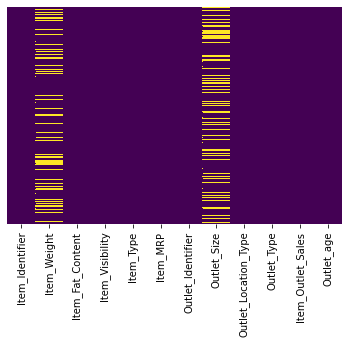

In [189]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

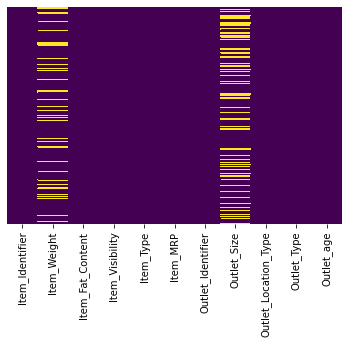

In [190]:
sns.heatmap(new_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##by looking at the above graph, we can say that not too much data is missing in the same area. they are evenly distrbuted 

# we have to check if the data is missing completely at random or not
for data missing completely at random, there should be equal probability of missing values for every variable and there should not be any relationship with other variables

Here, we have 'Item_weight' and 'Outlet_type' which subjectively says that there might not be dependant on each other
Although it needs domain expert knowledge to make a note why the data is missing , in this case I went with basic subjective knowledge saying that there is no relation
There any many imputation methods for no relation missing values such as mean , median, mode, random imputation , KNN etc..
I went with imputation methods using statistics since and it worked as good as KNN
Compared to KNN , statistical methods are preferably choosable since they do not require more computation and time

In [191]:
## imputing missing values for categorical variable 'Outlet_Size'
print(train.Outlet_Size.value_counts())
print(new_data.Outlet_Size.value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [192]:
## imputing categorical variable with the most repeated
mode=train['Outlet_Size'].mode().values[0]
train['Outlet_Size']=train['Outlet_Size'].replace(np.nan,mode,inplace=False)
mode1=new_data['Outlet_Size'].mode().values[0]
new_data['Outlet_Size']=new_data['Outlet_Size'].replace(np.nan,mode,inplace=False)

<AxesSubplot:>

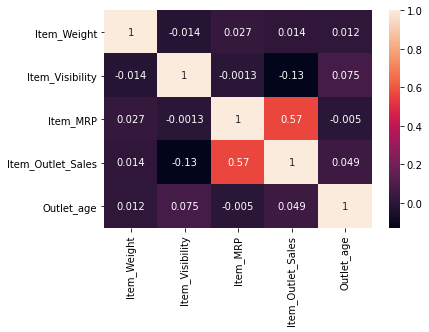

In [193]:
import seaborn as sns
import matplotlib as plt
corr=train.iloc[:,1:].corr()
top_features=corr.index
sns.heatmap(train[top_features].corr(),annot=True)

## checking the correlation after imputation of categorical variable to make sure it is not correlating with any other
## Also we can clearly see that the only variable correlating high with sales is MRP .

In [194]:
median_train=train['Item_Weight'].median()
print(median_train)
median_new_data=new_data['Item_Weight'].median()
print(median_new_data)

12.6
12.5


In [195]:
def impute_nan(train,variable,median_train):
    train[variable+"_median"]=train[variable].fillna(median_train)
    train[variable+"_random"]=train[variable]
    random_sample=train[variable].dropna().sample(train[variable].isnull().sum(),random_state=0)
    random_sample.index=train[train[variable].isnull()].index
    train.loc[train[variable].isnull(),variable+'_random']=random_sample

In [196]:
impute_nan(train,'Item_Weight',median_train)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_Weight_median,Item_Weight_random
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,23,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34,8.93,8.93


## imputed numerical variable with both median and random variable in  two different columns to compare

In [197]:
import matplotlib.pyplot as plt
%matplotlib inline

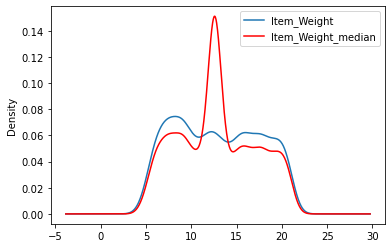

In [198]:
fig = plt.figure()
ax = fig.add_subplot(111)
train['Item_Weight'].plot(kind='kde', ax=ax)
train.Item_Weight_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## we can observe that there is a deviation in the distribution which leads to outilers

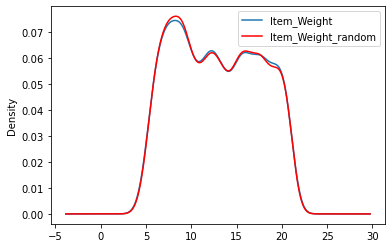

In [199]:
fig = plt.figure()
ax = fig.add_subplot(111)
train['Item_Weight'].plot(kind='kde', ax=ax)
train.Item_Weight_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## clearly, random weight imputation is much closer to item weight distribution

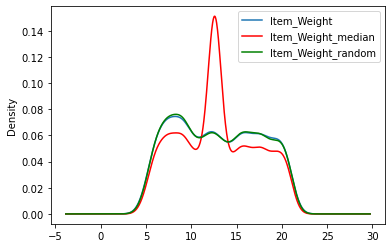

In [200]:
fig = plt.figure()
ax = fig.add_subplot(111)
train['Item_Weight'].plot(kind='kde', ax=ax)
train.Item_Weight_median.plot(kind='kde', ax=ax, color='red')
train.Item_Weight_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## 'Item_weight' and 'Item_weight_random' are in the same distribution and hence we can drop the imputaion with median

In [201]:
def impute_nan(test,variable,median_new_data):
    new_data[variable+"_median"]=new_data[variable].fillna(median_new_data)
    new_data[variable+"_random"]=new_data[variable]
    random_sample=test[variable].dropna().sample(test[variable].isnull().sum(),random_state=0)
    random_sample.index=test[test[variable].isnull()].index
    new_data.loc[new_data[variable].isnull(),variable+'_random']=random_sample

In [202]:
impute_nan(new_data,'Item_Weight',median_new_data)
new_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_age,Item_Weight_median,Item_Weight_random
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,22,20.750,20.750
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,14,8.300,8.300
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store,23,14.600,14.600
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,14,7.315,7.315
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,36,12.500,15.100


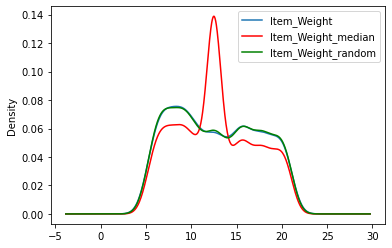

In [203]:
fig = plt.figure()
ax = fig.add_subplot(111)
new_data['Item_Weight'].plot(kind='kde', ax=ax)
new_data.Item_Weight_median.plot(kind='kde', ax=ax, color='red')
new_data.Item_Weight_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## it worked the same for testing , dropping 'Item_weight_median'

In [204]:
train=train.drop(['Item_Weight_median','Item_Weight'],axis=1)
new_data=new_data.drop(['Item_Weight_median','Item_Weight'],axis=1)

Relation of every column with target variable (Analysing data)

In [205]:
# Initially, we check if the data is normally distributed or left/right skewed in order to avoid outlier

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

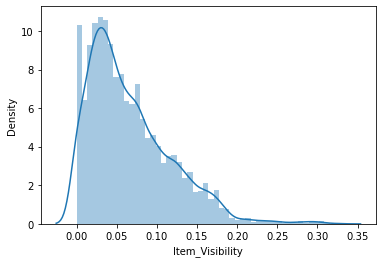

In [206]:
sns.distplot(train['Item_Visibility'])

# data is right skewed which shows that it is positively skewed
Although the data is skewed and is touching the peak points, outlier removal might lead to loosing of sensitive information
since this is a sales data , every information which increases/decreases the sales is equally important

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

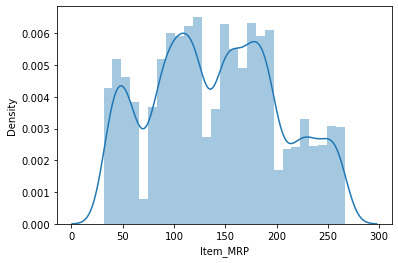

In [207]:
sns.distplot(train['Item_MRP'])

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

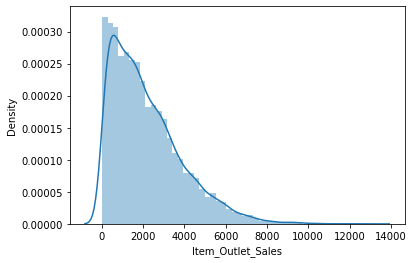

In [208]:
sns.distplot(train['Item_Outlet_Sales'])

In [209]:
## sales are positively skewed , also shows peakness

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outlet_age', ylabel='Density'>

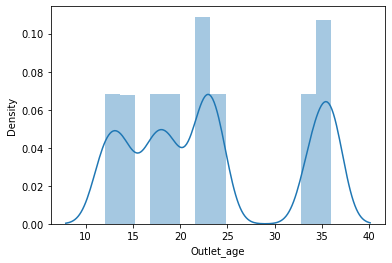

In [210]:
sns.distplot(train['Outlet_age'])

<AxesSubplot:>

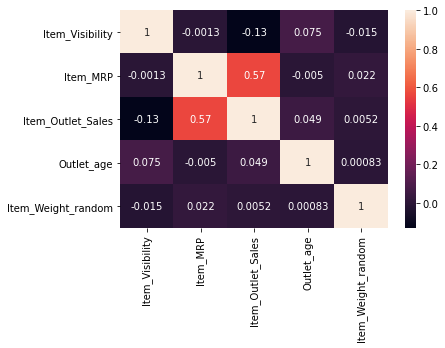

In [211]:
import seaborn as sns
import matplotlib as plt
corr=train.iloc[:,1:].corr()
top_features=corr.index
sns.heatmap(train[top_features].corr(),annot=True)

In [212]:
## in order to check relation between target variable, picking top correlated features with sales

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

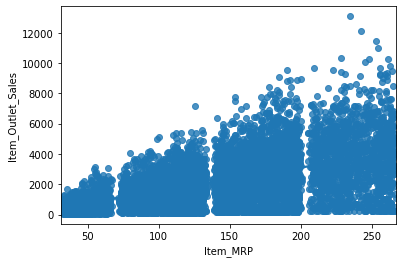

In [213]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=train)

In [214]:
## as correlation said in the heatmap, as the mrp is increasing, sales are gradually increasing which shows good correlation

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

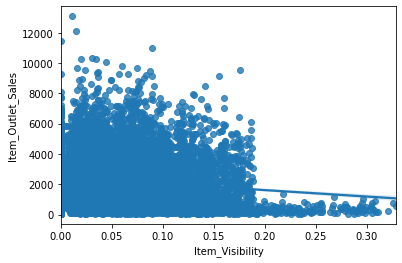

In [215]:
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train)

In [216]:
##Item_visibility does shows correlation in a negative direction

<AxesSubplot:xlabel='Item_Weight_random', ylabel='Item_Outlet_Sales'>

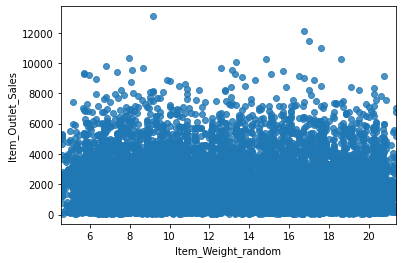

In [217]:
sns.regplot(x='Item_Weight_random',y='Item_Outlet_Sales',data=train)

In [218]:
## very less correlation

In [219]:
#ckecking possibilities to reduce dimensionality

In [220]:
## removing unnecessary columns based on subjective knowledge
train=train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
new_data=new_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

# handling categorical variables

In [221]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [222]:
## Item_type has anyway very less correlation with sales and it has too many categorical variables, we can decrease them into categories which can reduce the dimensionality
train['Item_Type']=train['Item_Type'].replace(['Fruits and Vegetables','Snack Foods','Household','Frozen Foods','Dairy','Canned','Baking Goods','Health and Hygiene','Soft Drinks','Meat','Breads','Hard Drinks','Starchy Foods','Breakfast','Seafood','Others'],['edible','edible','non-edible','edible','edible','edible','edible','non-edible','edible','edible','edible','edible','edible','edible','edible','non-edible'],inplace = False)
new_data['Item_Type']=new_data['Item_Type'].replace(['Fruits and Vegetables','Snack Foods','Household','Frozen Foods','Dairy','Canned','Baking Goods','Health and Hygiene','Soft Drinks','Meat','Breads','Hard Drinks','Starchy Foods','Breakfast','Seafood','Others'],['edible','edible','non-edible','edible','edible','edible','edible','non-edible','edible','edible','edible','edible','edible','edible','edible','non-edible'],inplace = False)

In [223]:
train['Item_Type'].value_counts()

edible        6924
non-edible    1599
Name: Item_Type, dtype: int64

In [224]:
new_data.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_age,Item_Weight_random
0,Low Fat,0.007565,edible,107.8622,Medium,Tier 1,Supermarket Type1,22,20.750
1,Regular,0.038428,edible,87.3198,Medium,Tier 2,Supermarket Type1,14,8.300
2,Low Fat,0.099575,non-edible,241.7538,Medium,Tier 3,Grocery Store,23,14.600
3,Low Fat,0.015388,edible,155.0340,Medium,Tier 2,Supermarket Type1,14,7.315
4,Regular,0.118599,edible,234.2300,Medium,Tier 3,Supermarket Type3,36,15.100


In [225]:
train.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_Weight_random
0,Low Fat,0.016047,edible,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,22,9.30
1,Regular,0.019278,edible,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,12,5.92
2,Low Fat,0.016760,edible,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,22,17.50
3,Regular,0.000000,edible,182.0950,Medium,Tier 3,Grocery Store,732.3800,23,19.20
4,Low Fat,0.000000,non-edible,53.8614,High,Tier 3,Supermarket Type1,994.7052,34,8.93


In [226]:
X=train[['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_age','Item_Weight_random']]
y=train['Item_Outlet_Sales']

In [227]:
categorical_columns = X.describe(include='object').columns.to_list()
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [228]:
X= pd.get_dummies(X,categorical_columns)

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [230]:
X.head()

,Item_Visibility,Item_MRP,Outlet_age,Item_Weight_random,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_edible,Item_Type_non-edible,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.016047,249.8092,22,9.30,1,0,1,0,0,1,0,1,0,0,0,1,0,0
1,0.019278,48.2692,12,5.92,0,1,1,0,0,1,0,0,0,1,0,0,1,0
2,0.016760,141.6180,22,17.50,1,0,1,0,0,1,0,1,0,0,0,1,0,0
3,0.000000,182.0950,23,19.20,0,1,1,0,0,1,0,0,0,1,1,0,0,0
4,0.000000,53.8614,34,8.93,1,0,0,1,1,0,0,0,0,1,0,1,0,0


In [231]:
categorical_columns2 = new_data.describe(include='object').columns.to_list()
categorical_columns2

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [232]:
new_data= pd.get_dummies(new_data,categorical_columns2)

In [233]:
new_data.head()

,Item_Visibility,Item_MRP,Outlet_age,Item_Weight_random,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_edible,Item_Type_non-edible,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.007565,107.8622,22,20.750,1,0,1,0,0,1,0,1,0,0,0,1,0,0
1,0.038428,87.3198,14,8.300,0,1,1,0,0,1,0,0,1,0,0,1,0,0
2,0.099575,241.7538,23,14.600,1,0,0,1,0,1,0,0,0,1,1,0,0,0
3,0.015388,155.0340,14,7.315,1,0,1,0,0,1,0,0,1,0,0,1,0,0
4,0.118599,234.2300,36,15.100,0,1,1,0,0,1,0,0,0,1,0,0,0,1


# FEATURE SELECTION

In [234]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [235]:
rank=model.feature_importances_

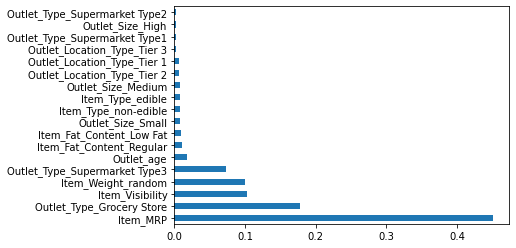

In [236]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(18).plot(kind='barh')
plt.show()

In [237]:
#Dropping unnecessary features that have below 0% can be done but in this case, since they are giving 0.002% information , i did not want to loose any minute information as well. 
#therefore no dropping is perfomed

In [238]:
X_train.shape

(6818, 18)

In [239]:
imp_fea=feat_importances.nlargest(18)
imp_fea

Item_MRP                         0.451301
Outlet_Type_Grocery Store        0.178467
Item_Visibility                  0.103282
Item_Weight_random               0.099696
Outlet_Type_Supermarket Type3    0.072914
Outlet_age                       0.018417
Item_Fat_Content_Regular         0.010272
Item_Fat_Content_Low Fat         0.009728
Outlet_Size_Small                0.008295
Item_Type_non-edible             0.008184
Item_Type_edible                 0.007967
Outlet_Size_Medium               0.007945
Outlet_Location_Type_Tier 2      0.007103
Outlet_Location_Type_Tier 1      0.006851
Outlet_Location_Type_Tier 3      0.002801
Outlet_Type_Supermarket Type1    0.002582
Outlet_Size_High                 0.002219
Outlet_Type_Supermarket Type2    0.001976
dtype: float64

# SCALING

In [240]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [241]:
X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X_test.columns)

X_test=sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [242]:
X_train.head()

,Item_Visibility,Item_MRP,Outlet_age,Item_Weight_random,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_edible,Item_Type_non-edible,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.600703,0.470709,-0.136169,-0.724616,-1.344216,1.344216,0.483533,-0.483533,-0.349985,0.797369,-0.622920,1.623061,-0.699265,-0.810472,-0.379673,0.73042,-0.352093,-0.354457
1,-0.362159,0.457877,-0.493521,1.111785,0.743928,-0.743928,-2.068113,2.068113,-0.349985,0.797369,-0.622920,-0.616120,1.430073,-0.810472,-0.379673,0.73042,-0.352093,-0.354457
2,0.194933,-0.482625,0.102066,1.025366,-1.344216,1.344216,0.483533,-0.483533,-0.349985,-1.254125,1.605343,1.623061,-0.699265,-0.810472,-0.379673,0.73042,-0.352093,-0.354457
3,-0.704944,-1.603553,-0.493521,-0.978471,0.743928,-0.743928,0.483533,-0.483533,-0.349985,0.797369,-0.622920,-0.616120,1.430073,-0.810472,-0.379673,0.73042,-0.352093,-0.354457
4,1.383177,0.218375,0.102066,-0.000858,0.743928,-0.743928,0.483533,-0.483533,-0.349985,-1.254125,1.605343,1.623061,-0.699265,-0.810472,-0.379673,0.73042,-0.352093,-0.354457


In [243]:
new_data=sc.fit_transform(new_data)
new_data=pd.DataFrame(new_data,columns=X_test.columns)

# MODEL IMPLEMENTATION**

# LINEAR REGRESSION

In [244]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression(normalize=True)
model1.fit(X_train,y_train)

LinearRegression(normalize=True)

In [245]:
y_pred_train_model1 = model1.predict(X_train)
from sklearn.metrics import r2_score
R2 = r2_score(y_train,y_pred_train_model1)
print("r2 score is :",R2)

r2 score is : 0.5584890480343382


In [246]:
y_pred_test_model1 = model1.predict(X_test)
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred_test_model1)
print("r2 score is :",R2)

r2 score is : 0.5814427807621453


In [247]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train,y_pred_train_model1))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train_model1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_model1)))

MAE: 848.0254742945029
MSE: 1306011.5756128645
RMSE: 1142.8086347297453


In [248]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_test_model1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_model1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_model1)))

MAE: 790.3513920535557
MSE: 1137625.993054822
RMSE: 1066.59551520472


# XGBOOST

In [249]:
from xgboost import XGBRegressor
model2= XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=5,
             min_child_weight=2, monotone_constraints='()',
             n_estimators=80, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [250]:
model2.fit(X_train,y_train)

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=80, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [261]:
y_pred_train_model2 = model2.predict(X_train)
from sklearn.metrics import r2_score
R2 = r2_score(y_train,y_pred_train_model2)
print("r2 score is :",R2)

r2 score is : 0.7037219067802329


In [262]:
print('MAE:', metrics.mean_absolute_error(y_train,y_pred_train_model2))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train_model2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_model2)))

MAE: 666.577049444037
MSE: 876405.4835396637
RMSE: 936.1653078060859


In [263]:
y_pred_test_model2 = model2.predict(X_test)
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred_test_model2)
print("r2 score is :",R2)

r2 score is : 0.5887121486767045


In [264]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_test_model2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_model2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_model2)))

MAE: 732.0325818719224
MSE: 1117868.068659826
RMSE: 1057.2928017629865


# GradientBoostingRegressor

In [251]:
from sklearn.ensemble import GradientBoostingRegressor
model3= GradientBoostingRegressor()

In [252]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [253]:
## implementing randomised search cv to get the best parameters

In [254]:
params = {'learning_rate': sp_randFloat(),'subsample'    : sp_randFloat(),'n_estimators' : sp_randInt(100, 1000),'max_depth'    : sp_randInt(4, 10)}

In [255]:
from sklearn.model_selection import RandomizedSearchCV
randm_search = RandomizedSearchCV(estimator=model3, param_distributions = params,
                               cv = 2, n_iter = 10, n_jobs=-1)
randm_search.fit(X_train, y_train)

RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EA6BC720D0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EA6BC72A60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EA6BC72070>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EA66CA2430>})

In [256]:
print("Best estimators",randm_search.best_estimator_)
print("Best score",randm_search.best_score_)
print("Best params",randm_search.best_params_)

Best estimators GradientBoostingRegressor(learning_rate=0.035727705537032306, max_depth=9,
                          n_estimators=428, subsample=0.5398942737129736)
Best score 0.5007542575969968
Best params {'learning_rate': 0.035727705537032306, 'max_depth': 9, 'n_estimators': 428, 'subsample': 0.5398942737129736}


In [257]:
model3=  GradientBoostingRegressor(learning_rate=0.0154291815347819, max_depth=9,
                          n_estimators=165, subsample=0.11550214721325958)

In [258]:
model3.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.0154291815347819, max_depth=9,
                          n_estimators=165, subsample=0.11550214721325958)

In [259]:
y_pred_train_model3 = model3.predict(X_train)
from sklearn.metrics import r2_score
R2 = r2_score(y_train,y_pred_train_model3)
print("r2 score is :",R2)

r2 score is : 0.6776034735947907


In [260]:
y_pred_test_model3 = model3.predict(X_test)
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred_test_model3)
print("r2 score is :",R2)

r2 score is : 0.6018660949454799


In [265]:
print('MAE:', metrics.mean_absolute_error(y_train,y_pred_train_model3))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train_model3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_model3)))

MAE: 705.3470595893957
MSE: 953665.1209851054
RMSE: 976.557791933025


In [266]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_test_model3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_model3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_model3)))

MAE: 741.4882558212227
MSE: 1082116.0364434097
RMSE: 1040.2480648592477


# FINAL RESULTS FOR TRAINING and TESTING DATA

In [270]:
## gradient boost regressor and xgboost regressor are giving almost same root mean saure error but, comparitively , GBR is giving slightly more error than xgboost
## if we observe r2 values of XGBOOST it is overfitting compared to GB REGRESSOR  
## one thing which is commonly observed is that testing data is only able to give 58% of r2 which means that only 58% is explainable by independant variable
## although in XGBOOST 70% is explainable is training , it is overfitting in the testing
## therefore best model which can predict BIGMART SALES would be GRADIENT BOOST REGRESSOR

In [280]:
import pickle
output=open("bigmartsales.pickle","wb")
pickle.dump(model3,output)

In [281]:
sales_pred=open("bigmartsales.pickle","rb")

In [282]:
emp=pickle.load(sales_pred)

In [283]:
pred=model3.predict(new_data)

In [284]:
pred

array([1641.85592007, 1464.84279012,  698.43625675, ..., 2033.1320589 ,
       4149.65199963, 1276.60574298])

In [285]:
new_data['Outlet_Sales']=pred

In [286]:
new_data.head()

,Item_Visibility,Item_MRP,Outlet_age,Item_Weight_random,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_edible,Item_Type_non-edible,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Sales
0,-1.134077,-0.536555,-0.139891,1.723127,0.740811,-0.740811,0.486429,-0.486429,-0.350325,0.798824,-0.623969,1.602644,-0.696584,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,1641.855920
1,-0.531850,-0.868937,-1.095512,-0.943601,-1.349873,1.349873,0.486429,-0.486429,-0.350325,0.798824,-0.623969,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,1464.842790
2,0.661316,1.629848,-0.020438,0.405827,0.740811,-0.740811,-2.055799,2.055799,-0.350325,0.798824,-0.623969,-0.623969,-0.696584,1.242623,2.620767,-1.375706,-0.349374,-0.351274,698.436257
3,-0.981416,0.226697,-1.095512,-1.154584,0.740811,-0.740811,0.486429,-0.486429,-0.350325,0.798824,-0.623969,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,2377.132168
4,1.032540,1.508110,1.532446,0.512925,-1.349873,1.349873,0.486429,-0.486429,-0.350325,0.798824,-0.623969,-0.623969,-0.696584,1.242623,-0.381568,-1.375706,-0.349374,2.846782,5921.778563


In [287]:
## we have predicted sales using GRADIENT BOOST REGRESSOR by loading it into pickle and predicting the new data
## the new_data 'Outlet_Sales' is now loaded into the new_data file